# Genetic Algorithm for Order-Pick-Problems 
## with Capacity- and Time-Restrictions

Functions for plotting and distance calculation

In [31]:
delta=10;
def plot_warehouse(axis,W_B,W_A,W_P,W_DX,order_list):
    act_loc=1;
    for b in range(W_B):
        for a in range(W_A):
            for l in range(W_P):

                rect = plt.Rectangle((4*a*delta,(b*(W_P+2)+l+2)*delta),delta,delta,fill=act_loc in order_list , edgecolor='black')
                axes.add_patch(rect)
                act_loc=act_loc+1
                rect = plt.Rectangle(((4*a+3)*delta,(b*(W_P+2)+l+2)*delta),delta,delta,fill=act_loc in order_list, edgecolor='black')
                axes.add_patch(rect)
                act_loc=act_loc+1

    #Plot Depot
    rect = plt.Rectangle(((W_DX-1)*delta,-2*delta),2*delta,2*delta, fill=False)
    axes.add_patch(rect)

    axes.set_xlim([0,4*W_A*delta])
    axes.set_ylim([-2*delta,(W_B*(W_P+2)+2)*delta])

def get_basl_location(location,W_A,W_P):
    block = int((location-1) / (2*W_A*W_P))
    temp=(location-1)-block*2*W_A*W_P
    aisle = int(temp / (2*W_P))
    temp = temp-aisle*2*W_P
    side = temp % 2
    pos = int(temp / 2);
    return(block,aisle,side,pos)

def get_xy_location(location,W_A,W_P):
    (b,a,s,l)=get_basl_location(location,W_A,W_P)
    x=(4*a+3*s+0.5)*delta
    y=(b*(W_P+2)+2+l+0.5)*delta
    return(x,y)

def get_two_points_route(start,stop,W_A,W_P,W_DX):
    if (start==0): return(get_depot_point_route(stop,W_A,W_P,W_DX))
    if (stop==0): return(get_depot_point_route(start,W_A,W_P,W_DX))
    
    points=[]
    (b1,a1,s1,l1)=get_basl_location(start,W_A,W_P)
    (b2,a2,s2,l2)=get_basl_location(stop,W_A,W_P)
    (x,y)=get_xy_location(start,W_A,W_P)
    (x2,y2)=get_xy_location(stop,W_A,W_P)
    
    points.append((x,y))
    x=x+15-s1*30
    points.append((x,y))

    if b1==b2:
        if a1==a2:
            y=y+(l2-l1)*delta
            points.append((x,y))
            x=x-15+s2*30
            points.append((x,y))
        else:
            if l1+l2<W_P:           #unten rum
                y=y-(l1+1.5)*delta
                points.append((x,y))
                x=x+(a2-a1)*4*delta
                points.append((x,y))
                y=y+(l2+1.5)*delta
                points.append((x,y))
                x=x-15+s2*30
                points.append((x,y))
            else:                        #oben rum
                y=y+(W_P-l1+0.5)*delta
                points.append((x,y))
                x=x+(a2-a1)*4*delta
                points.append((x,y))
                y=y-(W_P-l2+0.5)*delta
                points.append((x,y))
                x=x-15+s2*30
                points.append((x,y))
    else:
        if a1==a2:
            y=y+(l2-l1+(b2-b1)*(W_P+2))*delta
            points.append((x,y))
            x=x-15+s2*30
            points.append((x,y))
        else:
            if b1>b2:                   #nach unten
                y=y-((l1+1.5)+(b1-b2-1)*(W_P+2))*delta
                points.append((x,y))
                x=x+(a2-a1)*4*delta
                points.append((x,y))
                y=y-(W_P-l2+0.5)*delta
                points.append((x,y))
                x=x-15+s2*30
                points.append((x,y))
            else:                        #nach oben
                y=y+((W_P-l1+0.5)+(b2-b1-1)*(W_P+2))*delta
                points.append((x,y))
                x=x+(a2-a1)*4*delta
                points.append((x,y))
                y=y+(l2+1.5)*delta
                points.append((x,y))
                x=x-15+s2*30
                points.append((x,y))
    return(points)

def get_two_points_length(start,stop,W_A,W_P,W_DX):
    if ((start+stop)==0):
        return (0)
    if (start*stop != 0):
        (b1,a1,s1,l1)=get_basl_location(start,W_A,W_P)
        (b2,a2,s2,l2)=get_basl_location(stop,W_A,W_P)
        (x,y)=get_xy_location(start,W_A,W_P)
        (x2,y2)=get_xy_location(stop,W_A,W_P)
        x  = x  +15 - s1*30
        x2 = x2 +15 - s2*30

        if (a1==a2) or (b1!=b2):
            return(abs(x2-x)+abs(y2-y)+30) # Manhatten-Distance
        else:
            return (abs(x2-x)+min(2*W_P-(l1+l2)+1,(l1+l2)+3)*delta)+30
    else:
        (x,y)=get_xy_location(start+stop,W_A,W_P)
        return(abs(x-W_DX*delta)+abs(y+10))  

def get_depot_point_route(loc,W_A,W_P,W_DX):
    points=[];
    if(loc==0):
        return (points)
    (b,a,s,l)=get_basl_location(loc,W_A,W_P)
    (x,y)=get_xy_location(loc,W_A,W_P)
    points.append((x,y))
    x=x+(1.5-s*3)*delta
    points.append((x,y))
    y=y-(l+1.5+b*(W_P+2))*delta
    points.append((x,y))
    if W_DX!=(4*a+2):
        x=x+(W_DX-(4*a+2))*delta
        points.append((x,y))
    y=y-2*delta
    points.append((x,y))    
    return(points)

Generate a Order-Pick-Problem

<IPython.core.display.Javascript object>


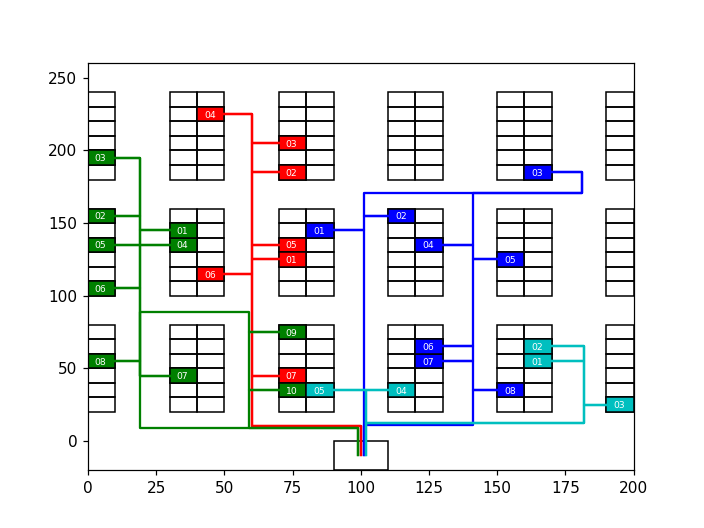

In [32]:
%config IPCompleter.greedy=True
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random

W_B=3;   #Number of Blocks in Warehouse
W_A=5;   #Number of Aisles in Warehouse
W_P=6;   #Number of Position per Aisle in Warehouse
W_DX=10; #X-Position of Depot
W_LOC = W_P*2*W_A*W_B; #Number of Locations in Warehouse
order_size=30;  #Number of positions in order_list
max_capacity = 50; #Capacity of vehicle
min_cap=1  #minimum capacity per article
max_cap=6  #maximum capacity per article
min_time=3 #minimum time_factor in distances
max_time=6 #maximum time_factor in distances
 
random.seed(4)
order_list=random.sample(range(1,W_LOC+1),order_size)
quantity_list=[random.randint(min_cap,max_cap) for i in range(order_size)]

max_time_list=[]
for number in range(order_size):
    route_length=get_two_points_length(0,order_list[number],W_A,W_P,W_DX)
    max_time_list.append(int(route_length*random.uniform(min_time,max_time)))
    
plt.cla()
axes=plt.gca();

plot_warehouse(axes,W_B,W_A,W_P,W_DX,order_list)

for i in range(order_size):
    (x,y)=get_xy_location(order_list[i],W_A,W_P)
    plt.text(x-3,y-4,'{:04d}'.format(max_time_list[i]),fontsize=4,color='white')    
    plt.text(x-1,y,'{:1d}'.format(quantity_list[i]),fontsize=4,color='white')

Functions for Genetic Algorithm

In [33]:
def create_valid_route(order_list,quantity_list,max_time_list,pick_list,max_capacity,W_A,W_P,W_DX):

    return_list=np.zeros(len(order_list),dtype=np.uint8)
    routes_cap=[]
    routes_length=[]
    pick_times=[]
    
    start=0
    sum_length=0
    sum_capacity=0
    for i in range(len(order_list)):
        Test1=(sum_capacity+quantity_list[pick_list[i]])>max_capacity
        Test2=(sum_length+get_two_points_length(start,order_list[pick_list[i]],W_A,W_P,W_DX))>max_time_list[pick_list[i]]
        if (Test1 or Test2):
            stop=0;    #Return to Depot
            length=get_two_points_length(start,stop,W_A,W_P,W_DX)
            sum_length+=length
            return_list[i-1]=1
            routes_cap.append(sum_capacity)
            routes_length.append(sum_length)
            sum_length=0;
            sum_capacity=0
            start=0
            
        stop=order_list[pick_list[i]]
        length=get_two_points_length(start,stop,W_A,W_P,W_DX)
        sum_length=sum_length+length
        pick_times.append(int(sum_length))
        sum_capacity = sum_capacity + quantity_list[pick_list[i]]     
        start=stop

    stop=0;
    length=get_two_points_length(start,stop,W_A,W_P,W_DX)
    sum_length=sum_length+length
    return_list[len(order_list)-1]=1 #Return to depot at the end
    routes_cap.append(sum_capacity)
    routes_length.append(sum_length)
    return(return_list,pick_times,routes_cap,routes_length)

def get_two_diff_integer_gauss(bereich,sigma):
    nr=abs(np.random.normal(0, sigma, 2)).astype(int)
    if nr[0]>bereich-2: nr[0]=bereich-2
    if nr[1]>bereich-2: nr[1]=bereich-2
    if (nr[1]>=nr[0]): nr[1]+=1
    return (nr)

def get_two_diff_integer(bereich):
    nr=abs(np.random.randint(0, bereich-1, 2)).astype(int)
    if (nr[1]>=nr[0]): nr[1]+=1
    else: (nr[0],nr[1])=(nr[1],nr[0])  #nr[0] > nr[1]
    return (nr)

def OX(parent1,parent2,pos1,pos2): #Order Crossover (OX)
    child=parent2.copy()

    k=0
    for i in range(len(child)):
        if ((i>=pos1) and (i<pos2)): continue
        while (parent1[k] in parent2[pos1:pos2]):k+=1
        child[i]=parent1[k]
        k+=1
    return (child)

def PMX(parent1,parent2,pos1,pos2): #Partial Mapped Crossover (PMX)
    parent1_part=parent1[pos1:pos2]
    parent2_part=parent2[pos1:pos2]
    child=parent1.copy()

    for i in range(len(child)):
        if ((i>=pos1) and (i<pos2)): continue
        while (child[i] in parent2_part): 
            child[i] = parent1_part[np.where(parent2_part==child[i])[0]]
    child[pos1:pos2]=parent2[pos1:pos2]
    return (child)

def AEX(parent1,parent2,pos,pos2): #Alternating Edges Crossover (AEX)
    parent = [parent1,parent2]
    child=np.ones(len(parent1),dtype=int)*(-1)
    a=0
    ind=0
    child[a]=parent[a&1][ind]

    while -1 in child:
        if (ind<(len(child)-1)) and (parent[a&1][ind+1] not in child):
            child[a+1]=parent[a&1][ind+1]
        else:
            rest=np.setdiff1d(parent[a&1],np.array(child))
            child[a+1]=rest[np.random.randint(len(rest))]
        a=a+1
        ind=np.where(child[a]==parent[a&1])[0]
    return (child)

def SWAP(pick_list,pos1,pos2):   #SWAP Mutation
    (pick_list[pos2],pick_list[pos1])=(pick_list[pos1],pick_list[pos2])
    return(pick_list)
  
def REV(pick_list,pos1,pos2):   #Reverse Region Mutation
    while (pos1<pos2):
        (pick_list[pos2],pick_list[pos1])=(pick_list[pos1],pick_list[pos2])
        pos1+=1
        pos2-=1
    return(pick_list)

def INS(pick_list,pos1,pos2):   #Insertion Mutation
    a=pick_list[pos1]
    while (pos1<pos2):
        pick_list[pos1]=pick_list[pos1+1]
        pos1+=1
    pick_list[pos1]=a
    return(pick_list)

def sort_population(list_arr,fitness_arr):
    combine = list(zip(list_arr,fitness_arr))      #combine pick_list with fitness
    combine = sorted(combine, key=lambda x: x[1])  #sort by ascending fitness
    list2_arr, fitness2_arr = [list(tuple) for tuple in zip(*combine)]
    return(list2_arr,fitness2_arr)


Search Solution with Generic Algorithm

In [35]:
import numpy as np
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

(used_crossover,used_mutation)=([OX,PMX,AEX],[SWAP,INS,REV])
nr_generations=1000

param_liste=[(20,00,30,0,False),
             (20,30,0,0,False),
             (20,30,0,0,True),
             (20,30,0,0.5,False),
             (20,30,0,0.5,True),
             (20,30,0,1,False),
             (20,30,0,1,True),
             (20,25,5,0.5,True),
             (20,20,10,0.5,True),
             (20,25,5,0.5,False),
             (20,20,10,0.5,False)]

param_liste=[(20,30,0,1,True)]

for param in param_liste:
    (parent_size,children_size,immigration_size,mutation_rate,destroy_twins)=param
    print (param)

    min_over_loop=[]
    min_gen_over_loop=[]
    loop_count=1

    for loop in range(loop_count):
        min_over_gen=[]
        doubles_over_gen=[]
        population_size=parent_size+children_size+immigration_size

        # Initial Population
        parents_list = [np.random.permutation(order_size) for i in range(parent_size)]
        parents_fit=[]
        for pick_list in parents_list:
            (_,_,_,routes_length)=create_valid_route(order_list,quantity_list,max_time_list,pick_list,max_capacity,W_A,W_P,W_DX)
            parents_fit.append(sum(routes_length))
        (parents_list,parents_fit)=sort_population(parents_list,parents_fit)
        min_over_gen.append(parents_fit[0])
        doubles_over_gen.append(0)


        for generation in range(nr_generations):
            #Generate Childrens
            childrens_list=[]
            childrens_fit=[]
            for number in range(children_size):
                (nr1,nr2)=get_two_diff_integer_gauss(parent_size,parent_size/5)
                (pos1,pos2)=get_two_diff_integer(order_size)
                child=used_crossover[np.random.randint(len(used_crossover))](parents_list[nr1],parents_list[nr2],pos1,pos2)
                (_,_,_,routes_length)=create_valid_route(order_list,quantity_list,max_time_list,child,max_capacity,W_A,W_P,W_DX)
                childrens_list.append(child)
                childrens_fit.append(sum(routes_length))

            #Generate Mutations
            for number in range(children_size):
                if np.random.rand(1)<mutation_rate:
                    (pos1,pos2) = get_two_diff_integer(order_size)
                    new_child = childrens_list[number].copy()
                    new_child=used_mutation[np.random.randint(len(used_mutation))](new_child,pos1,pos2)
                    (_,_,_,routes_length)=create_valid_route(order_list,quantity_list,max_time_list,new_child,max_capacity,W_A,W_P,W_DX)
                    if (childrens_fit[number]>sum(routes_length)):                  
                        childrens_list[number]=new_child
                        childrens_fit[number]=sum(routes_length)

            #Generate Immigrations
            immigrations_list = [np.random.permutation(order_size) for i in range(immigration_size)]
            immigrations_fit=[]
            for pick_list in immigrations_list:
                (_,_,_,routes_length)=create_valid_route(order_list,quantity_list,max_time_list,pick_list,max_capacity,W_A,W_P,W_DX)
                immigrations_fit.append(sum(routes_length))

            #take complete lists,exchange doubles and sort by fitness    
            population_list = parents_list + childrens_list + immigrations_list   
            population_list_unique=np.unique(population_list,axis=0)
            doubles_over_gen.append(len(population_list)-len(population_list_unique))
            if(destroy_twins):
                while len(population_list_unique)<population_size:
                    population_list=[]
                    for number in range (population_size):
                        if number < len (population_list_unique):
                            population_list.append(population_list_unique[number])
                        else:
                            population_list.append(np.random.permutation(order_size))
                    population_list_unique=np.unique(population_list,axis=0)

            population_fit=[]
            for pick_list in population_list:
                (_,_,_,routes_length)=create_valid_route(order_list,quantity_list,max_time_list,pick_list,max_capacity,W_A,W_P,W_DX)
                population_fit.append(sum(routes_length))

            (population_list,population_fit)=sort_population(population_list,population_fit)

            #take the best pop_size of generation
            parents_list = population_list[:parent_size]
            parents_fit = population_fit[:parent_size]

            min_over_gen.append(parents_fit[0])

        pick_list_min=parents_list[0] # Get best solution
        (return_list_min,pick_times_min,routes_cap_min,routes_length_min)=create_valid_route(order_list,quantity_list,max_time_list,pick_list_min,max_capacity,W_A,W_P,W_DX)

        #print(routes_cap_min)
        #print(routes_length_min)
        print("Minimum :",sum(routes_length_min), "after Generation",min_over_gen.index(min_over_gen[-1]))
        min_over_loop.append(sum(routes_length_min))
        min_gen_over_loop.append(min_over_gen.index(min_over_gen[-1]))
    print("Mean Minimum :",sum(min_over_loop)/loop_count, "Generation",sum(min_gen_over_loop)/loop_count)
    

if (False):
    fig, ax1 = plt.subplots()
    ax1.plot(min_over_gen,'b')
    #plt.xlabel('Generation')
    #ax1.set_ylabel('Minimale Distanz')
    ax2 = ax1.twinx()
    ax2.plot(doubles_over_gen,'r')
    #ax2.set_ylabel('Doppelte Lösungen')
    plt.show()
    
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 09:11:36
(20, 30, 0, 1, True)
Minimum : 2870.0 after Generation 81
Mean Minimum : 2870.0 Generation 81.0
Current Time = 09:12:28


Plot Solution

In [37]:
route_color =['r','b','g','c','m','k','y']
route_delta=[0,1,-1,2,-2,3,-3,4,-4,5,-5]
plt.cla()
axes=plt.gca();

pick_list=pick_list_min
return_list=return_list_min

plot_warehouse(axes,W_B,W_A,W_P,W_DX,order_list)

start=0
route_nr=0
act_route_length=np.argmax(return_list==1)
completed=-1
for i in range(len(order_list)):
    stop=order_list[pick_list[i]]
    points = get_two_points_route(start,stop,W_A,W_P,W_DX)
    (x,y)=zip(*points)
    x=np.array(x)+route_delta[route_nr]
    y=np.array(y)+route_delta[route_nr] 
    if (start==0):
        x[0]=x[0]-route_delta[route_nr]
        y[[0,1,-1]]=y[[0,1,-1]]-route_delta[route_nr]
    else:
        x[[0,-1]]=x[[0,-1]]-route_delta[route_nr]
        y[[0,1,-2,-1]]=y[[0,1,-2,-1]]-route_delta[route_nr]
    plt.plot(x,y,route_color[route_nr])    
    (b,a,s,l)=get_basl_location(stop,W_A,W_P)
    rect = plt.Rectangle(((4*a+3*s)*delta,(b*(W_P+2)+l+2)*delta),delta,delta, fill=True ,facecolor=route_color[route_nr], edgecolor='black')
    axes.add_patch(rect)
    (x,y)=get_xy_location(stop,W_A,W_P)
    plt.text(x-2.5,y-2.5,'{:02d}'.format(act_route_length-(i-completed)+2),fontsize=6,color='white')
    start=stop
    
    if (return_list[i]==1):
        stop=0
        points = get_two_points_route(start,stop,W_A,W_P,W_DX)
        (x,y)=zip(*points)
        x=np.array(x)+route_delta[route_nr]
        y=np.array(y)+route_delta[route_nr]
        x[0]=x[0]-route_delta[route_nr]
        y[[0,1,-1]]=y[[0,1,-1]]-route_delta[route_nr]
        plt.plot(x,y,route_color[route_nr])

        (x,y)=get_xy_location(stop,W_A,W_P)
        completed=i
        if completed+1<order_size:act_route_length=np.argmax(return_list[completed+1:]==1)
        start=0 
        route_nr=route_nr+1

plt.show()
for i in range(route_nr):
    print("Route: ",i,"Color : ",route_color[i]," Length : ",routes_length_min[i]," Capacity : ",routes_cap_min[i])
print("Total Length of Routes : ",sum(routes_length_min), "with total capacity : ",sum(routes_cap_min))


Route:  0 Color :  r  Length :  700.0  Capacity :  17
Route:  1 Color :  b  Length :  790.0  Capacity :  32
Route:  2 Color :  g  Length :  900.0  Capacity :  34
Route:  3 Color :  c  Length :  480.0  Capacity :  19
Total Length of Routes :  2870.0 with total capacity :  102


<IPython.core.display.Javascript object>


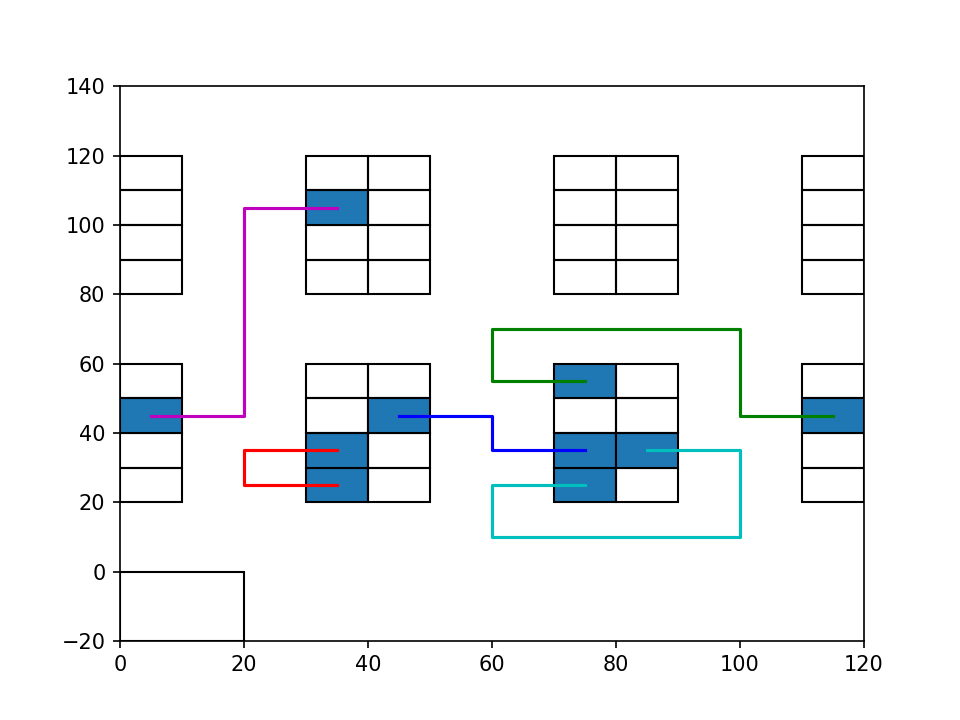

In [15]:
route_color =['r','b','g','c','m','k','y']
route_delta=[0,1,-1,2,-2,3,-3,4,-4,5,-5]
plt.cla()
axes=plt.gca();

W_B=2;   #Number of Blocks in Warehouse
W_A=3;   #Number of Aisles in Warehouse
W_P=4;   #Number of Position per Aisle in Warehouse
W_DX=1; #X-Position of Depot
W_LOC = W_P*2*W_A*W_B; #Number of Locations in Warehouse

plot_warehouse(axes,W_B,W_A,W_P,W_DX,[2, 4, 12,13,16,22,10,19,5,30])

points = get_two_points_route(2,4,W_A,W_P,W_DX)
(x,y)=zip(*points)
plt.plot(x,y,route_color[0])    

points = get_two_points_route(12,13,W_A,W_P,W_DX)
(x,y)=zip(*points)
plt.plot(x,y,route_color[1]) 

points = get_two_points_route(16,22,W_A,W_P,W_DX)
(x,y)=zip(*points)
plt.plot(x,y,route_color[2]) 

points = get_two_points_route(10,19,W_A,W_P,W_DX)
(x,y)=zip(*points)
plt.plot(x,y,route_color[3]) 
plt.show()

points = get_two_points_route(5,30,W_A,W_P,W_DX)
(x,y)=zip(*points)
plt.plot(x,y,route_color[4]) 
plt.show()



Plot Simulationresults

<IPython.core.display.Javascript object>


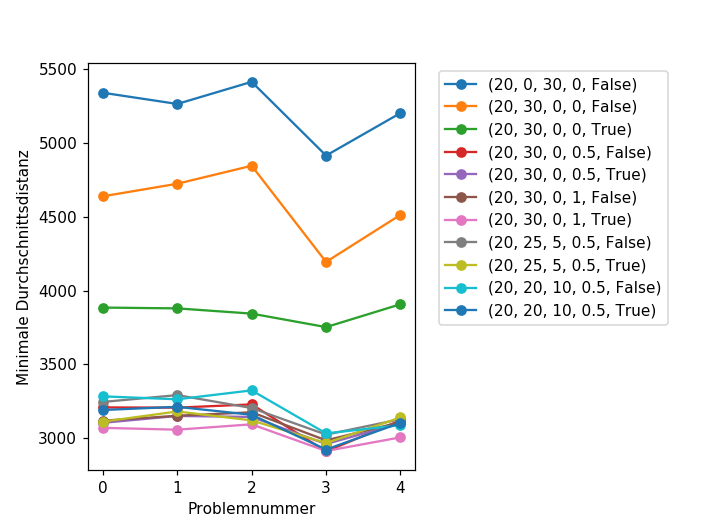

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt

legends=['(20, 0, 30, 0, False)',
         '(20, 30, 0, 0, False)',
         '(20, 30, 0, 0, True)',
         '(20, 30, 0, 0.5, False)',
         '(20, 30, 0, 0.5, True)',
         '(20, 30, 0, 1, False)',
         '(20, 30, 0, 1, True)',
         '(20, 25, 5, 0.5, False)',
         '(20, 25, 5, 0.5, True)',
         '(20, 20, 10, 0.5, False)',
         '(20, 20, 10, 0.5, True)']

results = [[5341.5,5265.5,5415.5,4915.5,5204.0],
           [4639.5,4724.5,4846.5,4194.5,4514.0],
           [3885,3879.5,3844.0,3752.5,3907.5],
           [3208,3206.5,3228.5,2909.5,3120.0],
           [3103.5,3150.0,3143.5,2959.5,3102.0],
           [3118,3151.5,3175.0,2984.5,3108.0],
           [3069.5,3057.0,3093.5,2912.5,3005.0],
           [3245,3291.5,3204.0,3023.5,3128.0],
           [3111.5,3180.5,3120.0,2966.0,3140.0],
           [3283.0,3263.0,3323.5,3032.0,3087.5],
           [3190.5,3212.0,3158.0,2922.5,3103.5]]


fig, ax = plt.subplots()
plt.plot(list(map(list, zip(*results))),marker='o')
plt.xlabel('Problemnummer')
plt.ylabel('Minimale Durchschnittsdistanz')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.6, box.height])
plt.legend(legends,bbox_to_anchor=(1.05, 1))
#ax.set_position([box.x0, box.y0, box.width * 0.6, box.height*0.7])
#plt.ylim((2900,3350))
plt.show()
